In [71]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [72]:
# Load data
cnn_div = pd.read_csv('data/cnn_encoder_diversity.csv', index_col=0)
tn_div = pd.read_csv('data/timenet_diversity.csv', index_col=0)

cnn_size = pd.read_csv('data/cnn_encoder_varied_size.csv', index_col=0)
tn_size = pd.read_csv('data/timenet_varied_size.csv', index_col=0)

cnn_holistic = pd.read_csv('data/holistic_cnn_encoder_results.csv', index_col=0)
tn_holistic = pd.read_csv('data/holistic_timenet_encoder_results.csv', index_col=0)

In [73]:
# Aggregate by diversity level and test dataset
cnn_div_agg = cnn_div.groupby(['diversity', 'test_dataset']).mean().reset_index()
tn_div_agg = tn_div.groupby(['diversity', 'test_dataset']).mean().reset_index()

cnn_div_agg.to_csv('data/cnn_encoder_diversity_agg.csv')
tn_div_agg.to_csv('data/timenet_diversity_agg.csv_agg.csv')

In [74]:
# Combine and sort by accuracy by test_dataset
cnn_div_agg['architecture'] = 'cnn'
tn_div_agg['architecture'] = 'rnn'

div_agg = pd.concat([cnn_div_agg, tn_div_agg])
ranked_div = div_agg.sort_values(['test_dataset', 'accuracy', 'f1'], ascending=False)

cnn_size['architecture'] = 'cnn'
tn_size['architecture'] = 'rnn'
size_df = pd.concat([cnn_size, tn_size])
ranked_size = size_df.sort_values(['test_dataset', 'accuracy', 'f1'], ascending=False)

In [75]:
# Correlations
ranked_div_corr = ranked_div.corr()
ranked_div_corr.to_csv('data/ranked_div_corr.csv')

ranked_div_grouped_corr = ranked_div.groupby('architecture').corr()
ranked_div_grouped_corr.to_csv('data/ranked_div_grouped_corr.csv')

cnn_ranked_div = ranked_div.loc[ranked_div['architecture'] == 'cnn']
cnn_ranked_corr_div = cnn_ranked_div.corr()
cnn_ranked_corr_div.to_csv('data/cnn_diversity_corr.csv')

tn_ranked_div = ranked_div.loc[ranked_div['architecture'] == 'rnn']
tn_ranked_corr_div = tn_ranked_div.corr()
tn_ranked_corr_div.to_csv('data/timenet_diversity_corr.csv')

ranked_size_corr = ranked_size.corr()
ranked_size_corr.to_csv('data/ranked_size_corr.csv')

ranked_size_grouped_corr = ranked_size.groupby('architecture').corr()
ranked_size_grouped_corr.to_csv('data/ranked_size_grouped_corr.csv')

cnn_ranked_size = ranked_size.loc[ranked_size['architecture'] == 'cnn']
cnn_ranked_corr_size = cnn_ranked_size.corr()
cnn_ranked_corr_size.to_csv('data/cnn_size_corr.csv')

tn_ranked_size = ranked_size.loc[ranked_size['architecture'] == 'rnn']
tn_ranked_corr_size = tn_ranked_size.corr()
tn_ranked_corr_size.to_csv('data/timenet_size_corr.csv')

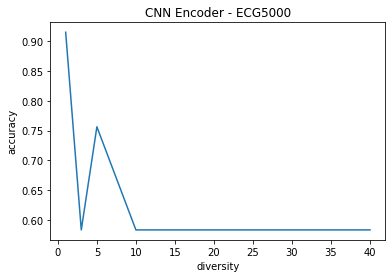

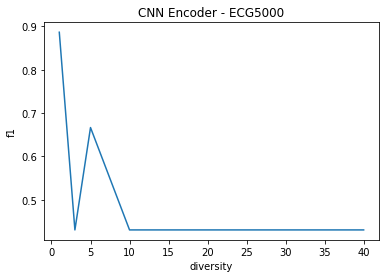

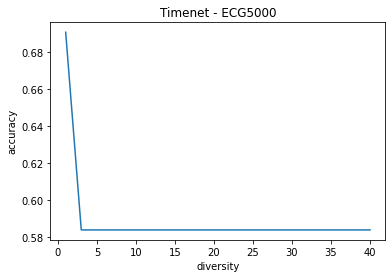

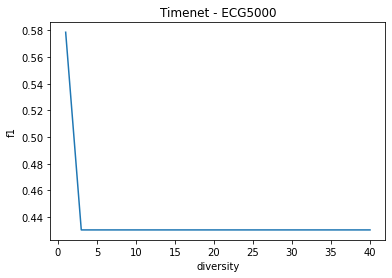

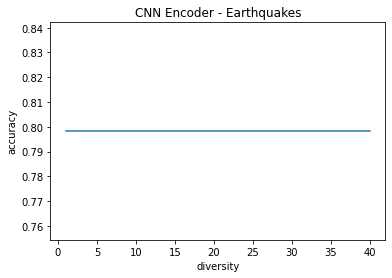

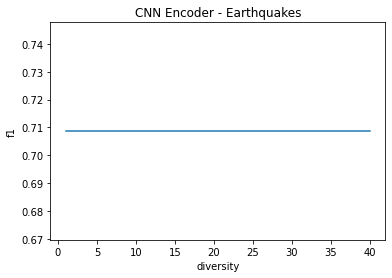

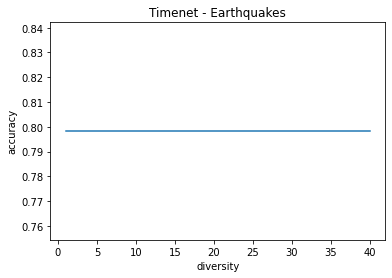

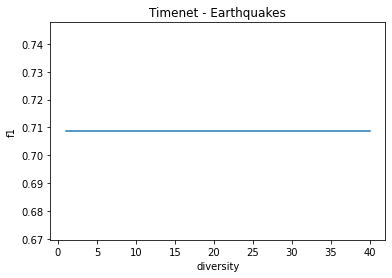

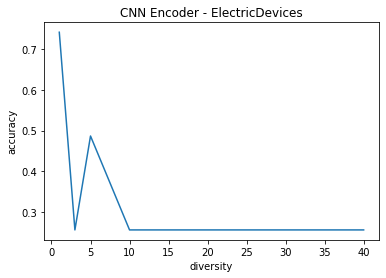

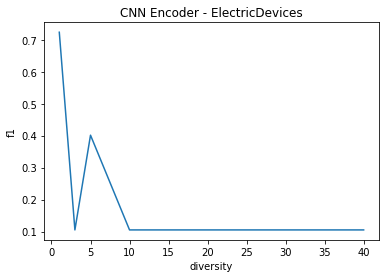

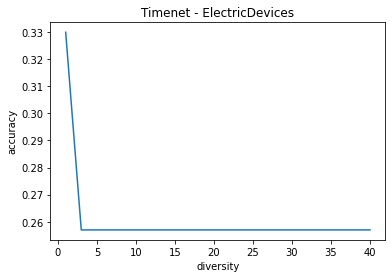

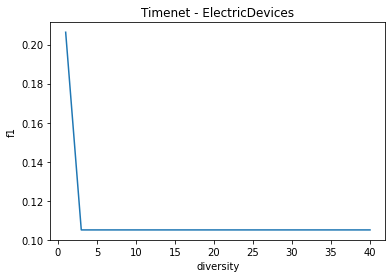

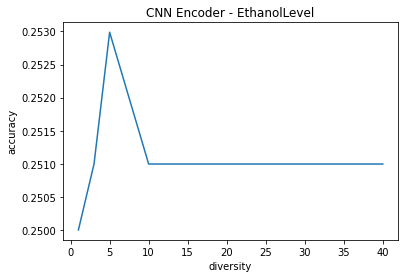

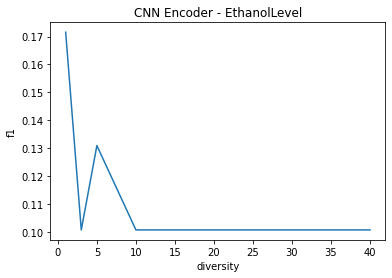

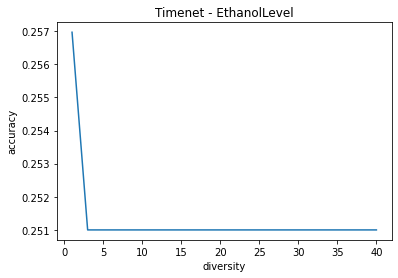

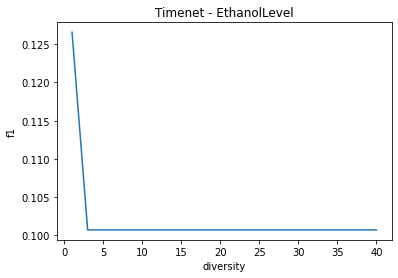

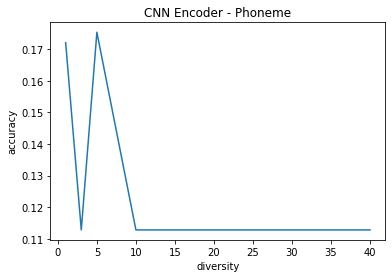

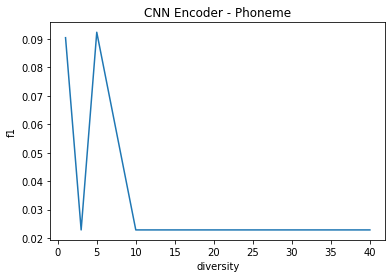

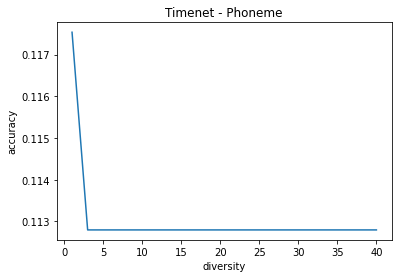

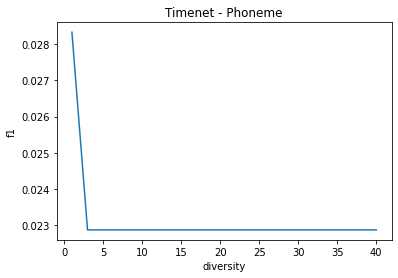

In [76]:
# Plot diversity v. accuracy, f1
for d_name in cnn_div_agg['test_dataset'].unique():
    cnn_div_subset = cnn_div_agg.loc[cnn_div_agg['test_dataset'] == d_name]

    ax = sns.lineplot(data=cnn_div_subset, x='diversity', y='accuracy')
    ax.set_title(f'CNN Encoder - {d_name}')
    plt.savefig(f'data/imgs/cnn_encoder_div_acc_{d_name}.png')
    plt.show()

    ax = sns.lineplot(data=cnn_div_subset, x='diversity', y='f1')
    ax.set_title(f'CNN Encoder - {d_name}')
    plt.savefig(f'data/imgs/cnn_encoder_div_f1_{d_name}.png')
    plt.show()

    tn_div_subset = tn_div_agg.loc[tn_div_agg['test_dataset'] == d_name]

    ax = sns.lineplot(data=tn_div_subset, x='diversity', y='accuracy')
    ax.set_title(f'Timenet - {d_name}')
    plt.savefig(f'data/imgs/timenet_encoder_div_acc_{d_name}.png')
    plt.show()

    ax = sns.lineplot(data=tn_div_subset, x='diversity', y='f1')
    ax.set_title(f'Timenet - {d_name}')
    plt.savefig(f'data/imgs/timenet_encoder_div_f1_{d_name}.png')
    plt.show()

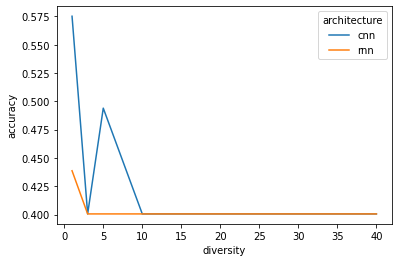

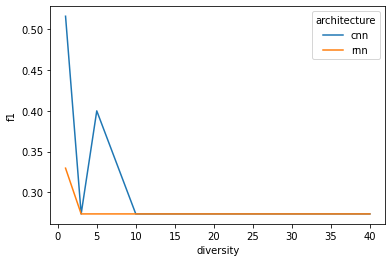

In [77]:
div_agg_by_div = div_agg.groupby(['architecture', 'diversity']).mean().reset_index()

sns.lineplot(x='diversity', y='accuracy', data=div_agg_by_div, hue='architecture')
plt.savefig('data/imgs/div_v_acc.png')
plt.show()

sns.lineplot(x='diversity', y='f1', data=div_agg_by_div, hue='architecture')
plt.savefig('data/imgs/div_v_f1.png')
plt.show()

In [94]:
cnn_div_agg_by_div = div_agg_by_div.loc[div_agg_by_div['architecture'] == 'cnn']
print(cnn_div_agg_by_div[['diversity', 'accuracy', 'f1']].to_latex(index=False,
                         caption='Aggregated CNN Diversity Experiment Results',
                         label='tab:cnn_div_res',
                         bold_rows=True,
                         float_format='%.2f'))

tn_div_agg_by_div = div_agg_by_div.loc[div_agg_by_div['architecture'] == 'rnn']
print(tn_div_agg_by_div[['diversity', 'accuracy', 'f1']].to_latex(index=False,
                         caption='Aggregated Timenet Diversity Experiment Results',
                         label='tab:timenet_div_res',
                         bold_rows=True,
                         float_format='%.2f'))

\begin{table}
\centering
\caption{Aggregated CNN Diversity Experiment Results}
\label{tab:cnn_div_res}
\begin{tabular}{rrr}
\toprule
 diversity &  accuracy &   f1 \\
\midrule
         1 &      0.58 & 0.52 \\
         3 &      0.40 & 0.27 \\
         5 &      0.49 & 0.40 \\
        10 &      0.40 & 0.27 \\
        20 &      0.40 & 0.27 \\
        40 &      0.40 & 0.27 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\caption{Aggregated Timenet Diversity Experiment Results}
\label{tab:timenet_div_res}
\begin{tabular}{rrr}
\toprule
 diversity &  accuracy &   f1 \\
\midrule
         1 &      0.44 & 0.33 \\
         3 &      0.40 & 0.27 \\
         5 &      0.40 & 0.27 \\
        10 &      0.40 & 0.27 \\
        20 &      0.40 & 0.27 \\
        40 &      0.40 & 0.27 \\
\bottomrule
\end{tabular}
\end{table}



In [78]:
# Do encoders trained on themselves do better than those that are not?
own_encoders_df = size_df.loc[size_df['train_dataset'] == size_df['test_dataset']]

# Avg scores among ~own_encoders
other_encoders_df = size_df.loc[size_df['train_dataset'] != size_df['test_dataset']]
other_encoder_agg = other_encoders_df.groupby(['samples', 'test_dataset', 'architecture']).mean().reset_index()
for arch in own_encoders_df['architecture'].unique():
    for d_name in own_encoders_df['test_dataset'].unique():
        for size in own_encoders_df['samples'].unique():
            own_bool_idx = (own_encoders_df['test_dataset'] == d_name) \
                           & (own_encoders_df['samples'] == size) \
                           & (own_encoders_df['architecture'] == arch)
            own_sub = own_encoders_df.loc[own_bool_idx]

            other_bool_idx = (other_encoder_agg['test_dataset'] == d_name) \
                             & (other_encoder_agg['samples'] == size) \
                             & (other_encoder_agg['architecture'] == arch)
            other_sub = other_encoder_agg.loc[other_bool_idx]

            try:
                assert len(own_sub) == len(other_sub) == 1
            except AssertionError as e:
                print('Missing', d_name, arch, size)
                continue

            print(f'{d_name} - {size} - {arch}:')
            print(f'acc: {own_sub["accuracy"].iloc[0] / other_sub["accuracy"].iloc[0]}')
            print(f'f1: {own_sub["f1"].iloc[0] / other_sub["f1"].iloc[0]}')

ElectricDevices - 50 - cnn:
acc: 1.0449782144210684
f1: 1.0619231004421097
ElectricDevices - 100 - cnn:
acc: 1.0909753490611453
f1: 1.1212297687609416
ElectricDevices - 500 - cnn:
acc: 1.1206932837481483
f1: 1.1492593731997975
ElectricDevices - 1000 - cnn:
acc: 1.1051832100108339
f1: 1.1327231773576922
EthanolLevel - 50 - cnn:
acc: 0.956274018476422
f1: 0.9586174814904913
EthanolLevel - 100 - cnn:
acc: 0.9820857801233923
f1: 0.9972115043615472
EthanolLevel - 500 - cnn:
acc: 0.9771636329071814
f1: 0.9397421356084407
EthanolLevel - 1000 - cnn:
acc: 0.9435257706286577
f1: 0.9342138750654903
Phoneme - 50 - cnn:
acc: 1.6046689205213935
f1: 2.5923772675665226
Phoneme - 100 - cnn:
acc: 1.6975144764797443
f1: 2.9459949514443933
Phoneme - 500 - cnn:
acc: 1.3606068438421561
f1: 1.9529824396613003
Phoneme - 1000 - cnn:
acc: 1.4795388308258675
f1: 2.0203210103949205
ECG5000 - 50 - cnn:
acc: 1.0006494477128995
f1: 1.0006636005208178
ECG5000 - 100 - cnn:
acc: 1.003465833970321
f1: 1.0037400345117435

In [79]:
results_df = pd.DataFrame(columns=['architecture', 'test_dataset', 'accuracy_ratio', 'f1_ratio'])
res_list = []

# Do encoders trained on themselves do better than those that are not?
own_encoders_df = size_df.loc[size_df['train_dataset'] == size_df['test_dataset']]
own_encoders_agg = own_encoders_df.groupby(['test_dataset', 'architecture']).mean().reset_index()

# Avg scores among ~own_encoders
other_encoders_df = size_df.loc[size_df['train_dataset'] != size_df['test_dataset']]
other_encoder_agg = other_encoders_df.groupby(['test_dataset', 'architecture']).mean().reset_index()
for arch in own_encoders_df['architecture'].unique():
    for d_name in own_encoders_df['test_dataset'].unique():
        own_bool_idx = (own_encoders_agg['test_dataset'] == d_name) \
                       & (own_encoders_agg['architecture'] == arch)
        own_sub = own_encoders_agg.loc[own_bool_idx]

        other_bool_idx = (other_encoder_agg['test_dataset'] == d_name) \
                         & (other_encoder_agg['architecture'] == arch)
        other_sub = other_encoder_agg.loc[other_bool_idx]

        try:
            assert len(own_sub) == len(other_sub) == 1
        except AssertionError as e:
            print('Missing', d_name, arch)
            print(len(own_sub), len(other_sub))
            continue

        print(f'{d_name} - {arch}:')
        acc_ratio = own_sub["accuracy"].iloc[0] / other_sub["accuracy"].iloc[0]
        print(f'acc: {acc_ratio}')
        f1_ratio = own_sub["f1"].iloc[0] / other_sub["f1"].iloc[0]
        print(f'f1: {f1_ratio}')

        res_list.append(
            {'architecture': arch,
             'test_dataset': d_name,
             'accuracy_ratio': acc_ratio,
             'f1_ratio': f1_ratio}
        )
    
results_df = results_df.from_records(res_list)

print('LATEX TABLE')
print('------------')
print(results_df.to_latex(index=False, 
                          caption='Experienced vs. unexperienced encoder classification performance',
                          label='tab:expVunexp',
                          bold_rows=True,
                          float_format='%.2f')
     )

ElectricDevices - cnn:
acc: 1.090645837549161
f1: 1.116621894160825
EthanolLevel - cnn:
acc: 0.9647015562918063
f1: 0.9569842606965041
Phoneme - cnn:
acc: 1.530967942941482
f1: 2.325193449071609
ECG5000 - cnn:
acc: 1.0035950084701317
f1: 1.003771103874101
Earthquakes - cnn:
acc: 1.0000000000000002
f1: 1.0
ElectricDevices - rnn:
acc: 0.9834451901565996
f1: 0.9453626246993019
EthanolLevel - rnn:
acc: 1.0406515784921437
f1: 1.3993179513493896
Phoneme - rnn:
acc: 0.9643684202917765
f1: 0.8932517075103258
ECG5000 - rnn:
acc: 1.0154302344736699
f1: 1.0196302118514327
Earthquakes - rnn:
acc: 1.015202568252368
f1: 1.0325615481048398
LATEX TABLE
------------
\begin{table}
\centering
\caption{Experienced vs. unexperienced encoder classification performance}
\label{tab:expVunexp}
\begin{tabular}{llrr}
\toprule
architecture &     test\_dataset &  accuracy\_ratio &  f1\_ratio \\
\midrule
         cnn &  ElectricDevices &            1.09 &      1.12 \\
         cnn &     EthanolLevel &            0.

In [80]:
shared_sets = list(set(cnn_holistic.dropna()['test_dataset']) & set(tn_holistic.dropna()['test_dataset']))
cnn_sub = cnn_holistic.loc[cnn_holistic['test_dataset'].isin(shared_sets)]
tn_sub = tn_holistic.loc[tn_holistic['test_dataset'].isin(shared_sets)]

x = np.sum(((cnn_sub['accuracy']
  / tn_sub['accuracy']).dropna() > 1).astype(int)) / len(cnn_sub)
# y = np.sum(((cnn_sub['accuracy']
#   / tn_sub['accuracy']).dropna() < 1).astype(int)) / len(cnn_sub)
# z = np.sum(((cnn_sub['accuracy']
#       / tn_sub['accuracy']).dropna() == 1).astype(int)) / len(cnn_sub)

print(x)

0.9152542372881356


In [81]:
cnn_train_time = cnn_holistic.iloc[0]['train_time']
tn_train_time = tn_holistic.iloc[0]['train_time']
print(f'cnn time: {cnn_train_time/60} m')
print(f'timenet time: {tn_train_time/60**2} h')
print('ratio:', cnn_train_time / tn_train_time)

cnn time: 14.423928511142728 m
timenet time: 8.196563900974063 h
ratio: 0.029329217880004203


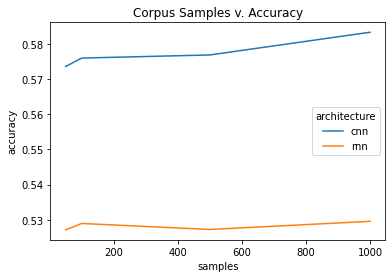

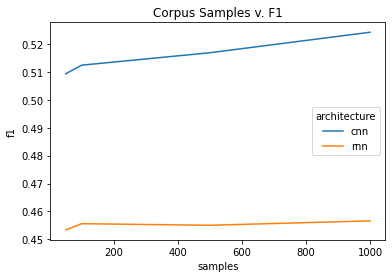

\begin{table}
\centering
\caption{Aggregated Size Experiment Results}
\label{tab:size_res}
\begin{tabular}{rrr}
\toprule
 samples &  accuracy &   f1 \\
\midrule
      50 &      0.57 & 0.51 \\
      50 &      0.53 & 0.45 \\
     100 &      0.58 & 0.51 \\
     100 &      0.53 & 0.46 \\
     500 &      0.58 & 0.52 \\
     500 &      0.53 & 0.46 \\
    1000 &      0.58 & 0.52 \\
    1000 &      0.53 & 0.46 \\
\bottomrule
\end{tabular}
\end{table}



In [90]:
# Overall size v perf
size_agg = size_df.groupby(['samples', 'architecture']).mean().reset_index()
ax = sns.lineplot(x='samples', y='accuracy', hue='architecture', data=size_agg)
ax.set_title('Corpus Samples v. Accuracy')
plt.savefig('data/imgs/size_v_acc.png')
plt.show()

ax = sns.lineplot(x='samples', y='f1', hue='architecture', data=size_agg)
ax.set_title('Corpus Samples v. F1')
plt.savefig('data/imgs/size_v_f1.png')
plt.show()

In [95]:
cnn_size_agg = size_agg.loc[size_agg['architecture'] == 'cnn']
print(size_agg[['samples', 'accuracy', 'f1']].to_latex(index=False,
                                                caption='Aggregated CNN Size Experiment Results',
                                                label='tab:cnn_size_res',
                                                bold_rows=True,
                                                float_format='%.2f'))

tn_size_agg = size_agg.loc[size_agg['architecture'] == 'rnn']
print(tn_size_agg[['samples', 'accuracy', 'f1']].to_latex(index=False,
                                                caption='Aggregated Timenet Size Experiment Results',
                                                label='tab:timenet_size_res',
                                                bold_rows=True,
                                                float_format='%.2f'))

\begin{table}
\centering
\caption{Aggregated CNN Size Experiment Results}
\label{tab:cnn_size_res}
\begin{tabular}{rrr}
\toprule
 samples &  accuracy &   f1 \\
\midrule
      50 &      0.57 & 0.51 \\
      50 &      0.53 & 0.45 \\
     100 &      0.58 & 0.51 \\
     100 &      0.53 & 0.46 \\
     500 &      0.58 & 0.52 \\
     500 &      0.53 & 0.46 \\
    1000 &      0.58 & 0.52 \\
    1000 &      0.53 & 0.46 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\caption{Aggregated Timenet Size Experiment Results}
\label{tab:timenet_size_res}
\begin{tabular}{rrr}
\toprule
 samples &  accuracy &   f1 \\
\midrule
      50 &      0.53 & 0.45 \\
     100 &      0.53 & 0.46 \\
     500 &      0.53 & 0.46 \\
    1000 &      0.53 & 0.46 \\
\bottomrule
\end{tabular}
\end{table}



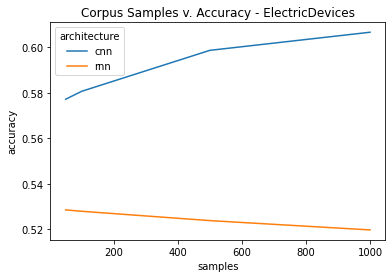

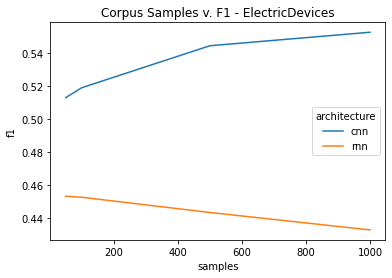

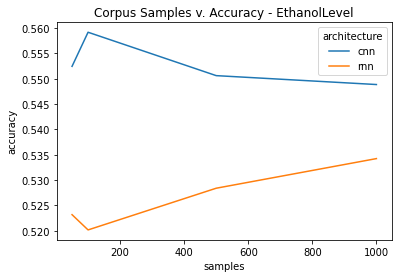

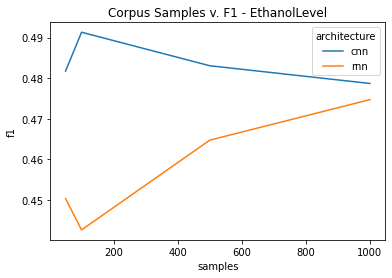

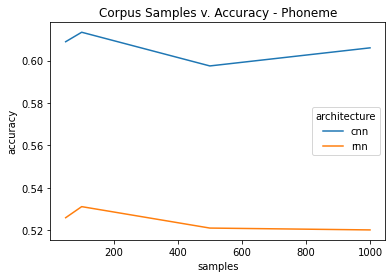

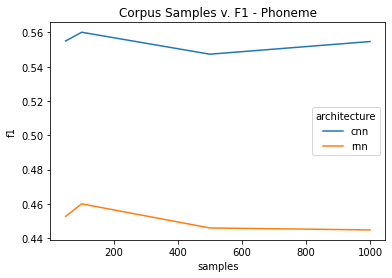

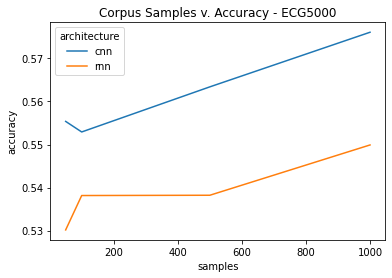

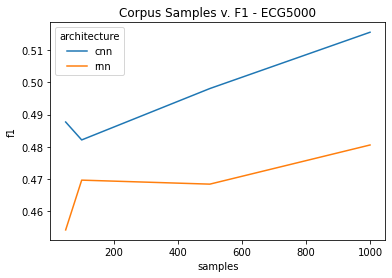

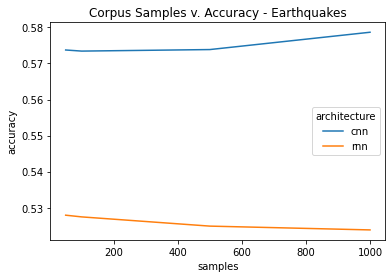

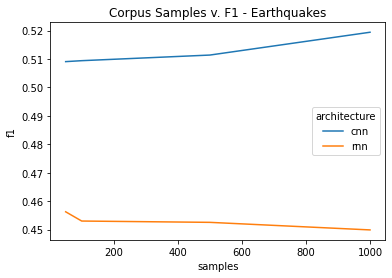

In [83]:
# Per dataset size v perf (train dataset)
for d_name in size_df['train_dataset'].unique():
    size_sub = size_df.loc[size_df['train_dataset'] == d_name]

    size_agg = size_sub.groupby(['samples', 'architecture']).mean().reset_index()
    ax = sns.lineplot(x='samples', y='accuracy', hue='architecture', data=size_agg)
    ax.set_title(f'Corpus Samples v. Accuracy - {d_name}')
    plt.savefig(f'data/imgs/{d_name}_train_size_v_acc.png')
    plt.show()

    ax = sns.lineplot(x='samples', y='f1', hue='architecture', data=size_agg)
    ax.set_title(f'Corpus Samples v. F1 - {d_name}')
    plt.savefig(f'data/imgs/{d_name}_train_size_v_f1.png')
    plt.show()

In [87]:
print(cnn_div.groupby(['test_dataset', 'diversity']).std()['accuracy'])
print(tn_div.groupby(['test_dataset', 'diversity']).std()['accuracy'])

test_dataset     diversity
ECG5000          1            0.015703
                 3                 NaN
                 5            0.243952
                 10           0.000000
                 20           0.000000
                 40           0.000000
Earthquakes      1            0.000000
                 3                 NaN
                 5            0.000000
                 10           0.000000
                 20           0.000000
                 40           0.000000
ElectricDevices  1            0.031884
                 3                 NaN
                 5            0.325013
                 10           0.000000
                 20           0.000000
                 40           0.000000
EthanolLevel     1            0.012076
                 3                 NaN
                 5            0.002816
                 10           0.000000
                 20           0.000000
                 40           0.000000
Phoneme          1            0.04095

In [88]:
# Holistic model analysis
datasets = cnn_size['test_dataset'].unique()

cnn_hol_sub = cnn_holistic.loc[cnn_holistic['test_dataset'].isin(datasets)][['test_dataset', 'accuracy', 'f1']]
print(cnn_hol_sub.to_latex(index=False,
                           caption='CNN Holistic Encoder Classification Performance',
                           label='tab:cnn_hol',
                           bold_rows=True,
                           float_format='%.2f'))

tn_hol_sub = tn_holistic.loc[tn_holistic['test_dataset'].isin(datasets)][['test_dataset', 'accuracy', 'f1']]
print(tn_hol_sub.to_latex(index=False,
                           caption='Timenet Holistic Encoder Classification Performance',
                           label='tab:timenet_hol',
                           bold_rows=True,
                           float_format='%.2f'))

\begin{table}
\centering
\caption{CNN Holistic Encoder Classification Performance}
\label{tab:cnn_hol}
\begin{tabular}{lrr}
\toprule
    test\_dataset &  accuracy &   f1 \\
\midrule
    EthanolLevel &      0.24 & 0.16 \\
         Phoneme &      0.22 & 0.14 \\
         ECG5000 &      0.93 & 0.91 \\
 ElectricDevices &      0.73 & 0.71 \\
     Earthquakes &      0.80 & 0.71 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\caption{Timenet Holistic Encoder Classification Performance}
\label{tab:timenet_hol}
\begin{tabular}{lrr}
\toprule
    test\_dataset &  accuracy &   f1 \\
\midrule
    EthanolLevel &      0.26 & 0.16 \\
         Phoneme &      0.11 & 0.02 \\
         ECG5000 &      0.88 & 0.85 \\
 ElectricDevices &      0.27 & 0.15 \\
     Earthquakes &      0.80 & 0.71 \\
\bottomrule
\end{tabular}
\end{table}

